In [1]:
import pandas as pd

import numpy as np

import seaborn as sns 

from matplotlib import pyplot as plt

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , MinMaxScaler , StandardScaler , LabelEncoder 

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest , chi2

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.metrics import accuracy_score , classification_report

from sklearn.pipeline import Pipeline , make_pipeline

from sklearn.metrics import accuracy_score

import warnings 

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\DATA SCIENCE\retail_store_inventory.csv')

In [3]:
data.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [4]:
data.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


In [5]:
data.isnull().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [7]:
data.shape

(73100, 15)

In [8]:
data.sample()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
22679,2022-08-15,S004,P0020,Groceries,West,265,35,155,50.72,25.93,10,Snowy,0,26.15,Summer


In [9]:
data.drop(['Store ID', 'Product ID'], axis=1, inplace=True)


In [10]:
data.sample()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
11551,2022-04-26,Furniture,North,266,127,95,134.57,72.13,10,Cloudy,0,70.02,Summer


In [11]:
data['Date'] = pd.to_datetime(data['Date'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Category            73100 non-null  object        
 2   Region              73100 non-null  object        
 3   Inventory Level     73100 non-null  int64         
 4   Units Sold          73100 non-null  int64         
 5   Units Ordered       73100 non-null  int64         
 6   Demand Forecast     73100 non-null  float64       
 7   Price               73100 non-null  float64       
 8   Discount            73100 non-null  int64         
 9   Weather Condition   73100 non-null  object        
 10  Holiday/Promotion   73100 non-null  int64         
 11  Competitor Pricing  73100 non-null  float64       
 12  Seasonality         73100 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(5), ob

In [13]:
data['year'] = data['Date'].dt.year
data['month_no'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [14]:
data.sample()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,year,month_no,day
47510,2023-04-21,Electronics,North,142,105,40,105.81,82.89,20,Cloudy,1,82.21,Autumn,2023,4,21


<Axes: xlabel='Inventory Level'>

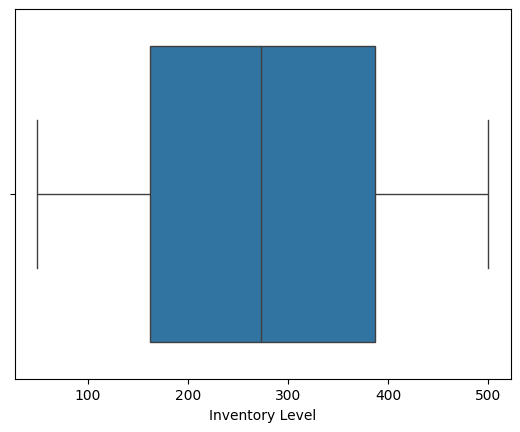

In [15]:
sns.boxplot(x = data['Inventory Level'])


<Axes: xlabel='Units Sold'>

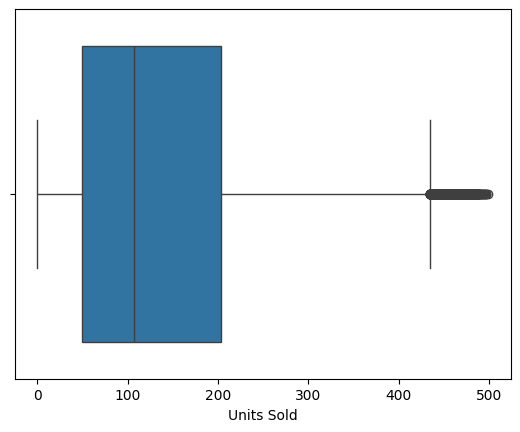

In [16]:
sns.boxplot(x = data['Units Sold'])


<Axes: xlabel='Units Ordered'>

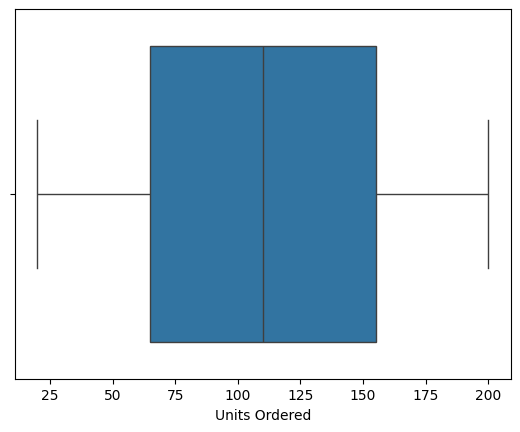

In [17]:
sns.boxplot(x = data['Units Ordered'])


<Axes: xlabel='Demand Forecast'>

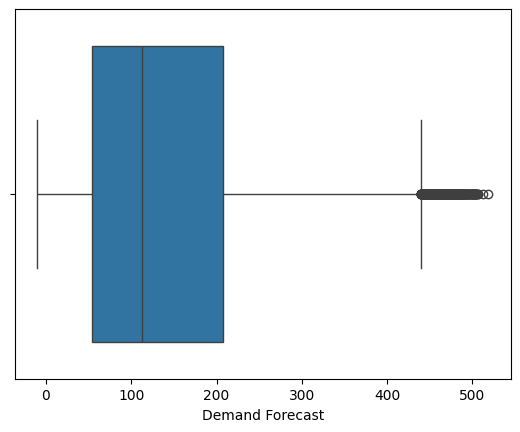

In [18]:
sns.boxplot(x = data['Demand Forecast'])


<Axes: xlabel='Price'>

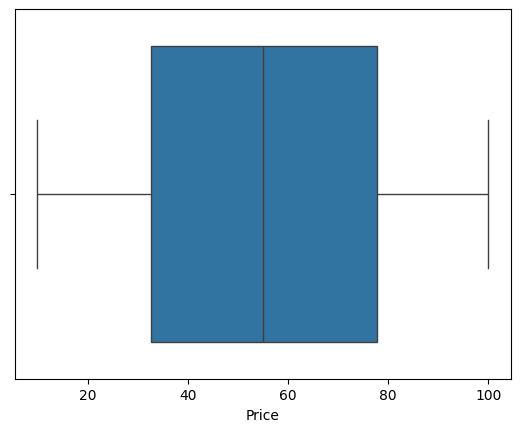

In [19]:
sns.boxplot(x = data['Price'])


<Axes: xlabel='Discount'>

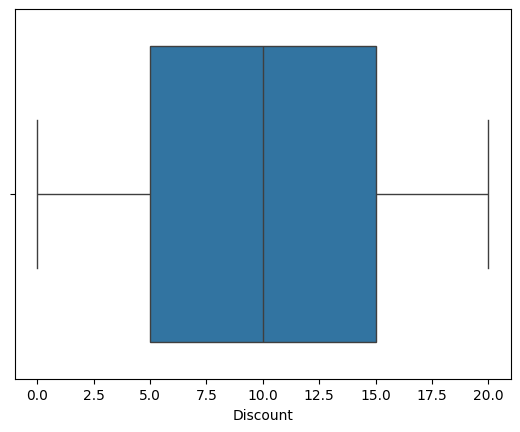

In [20]:
sns.boxplot(x = data['Discount'])


<Axes: xlabel='Competitor Pricing'>

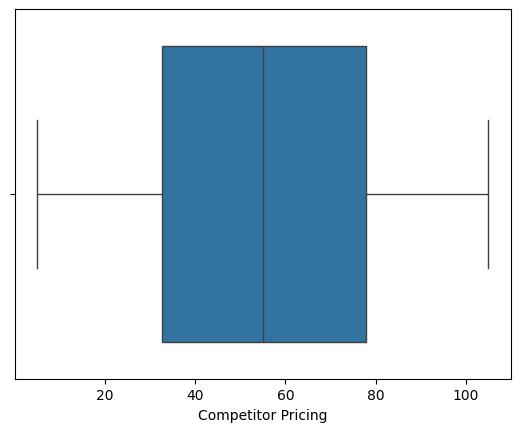

In [21]:
sns.boxplot(x = data['Competitor Pricing'])


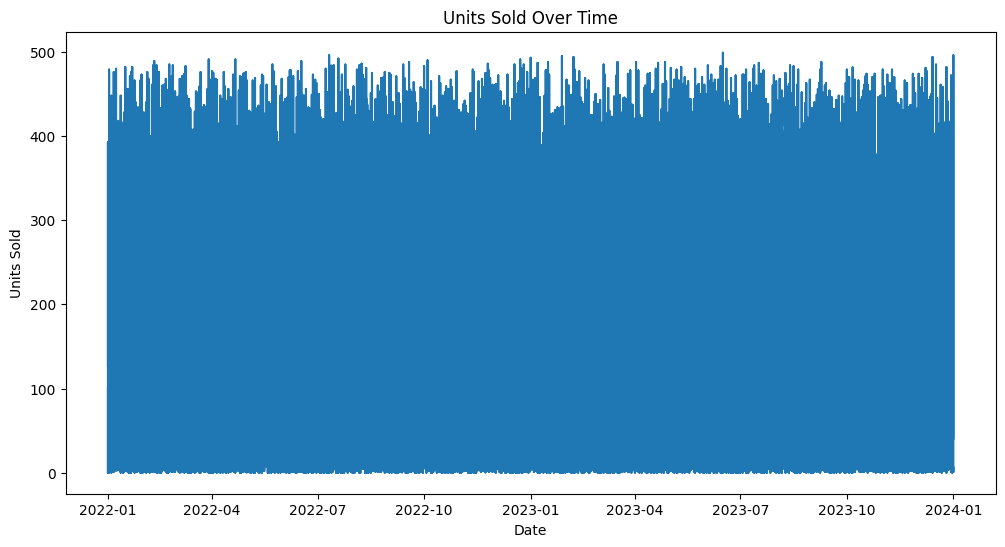

In [22]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Units Sold'])
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

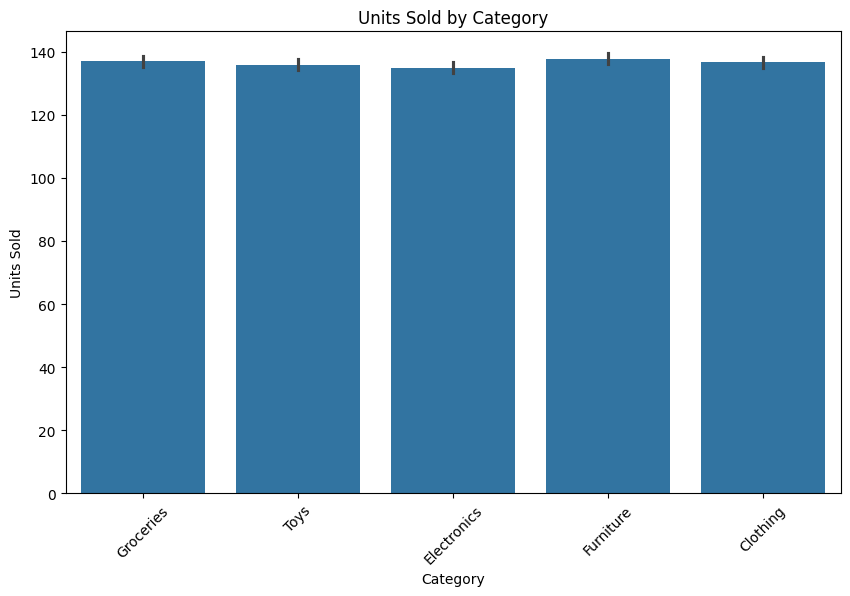

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Units Sold', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

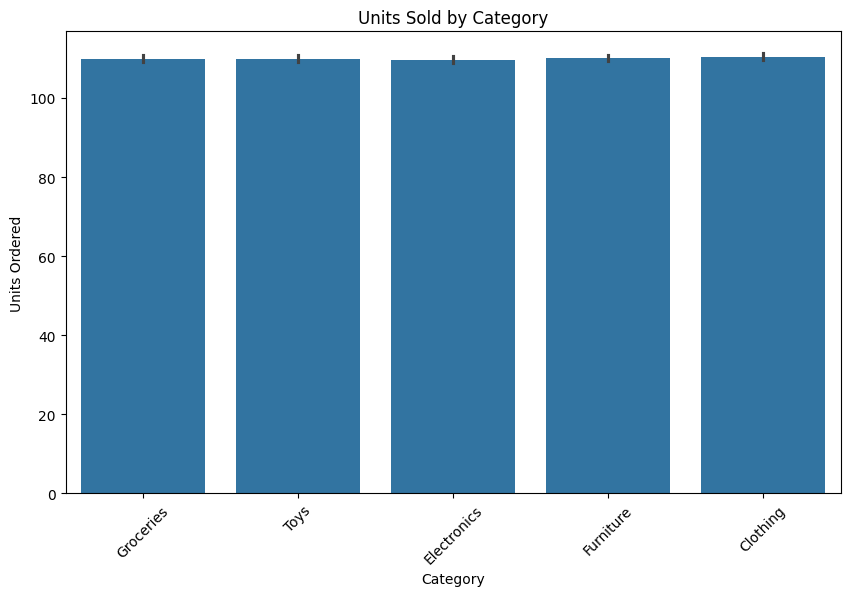

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Units Ordered', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

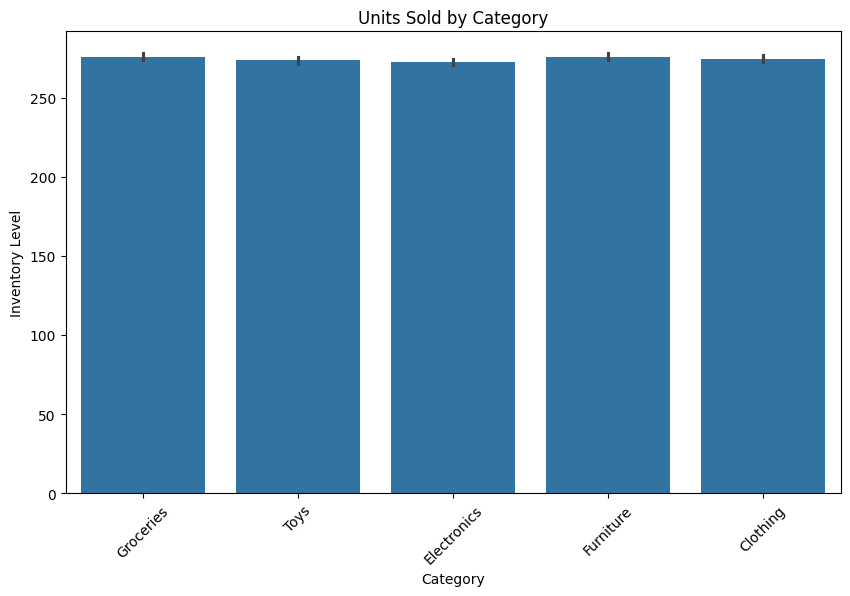

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Inventory Level', data=data)
plt.title('Units Sold by Category')
plt.xticks(rotation=45)
plt.show()

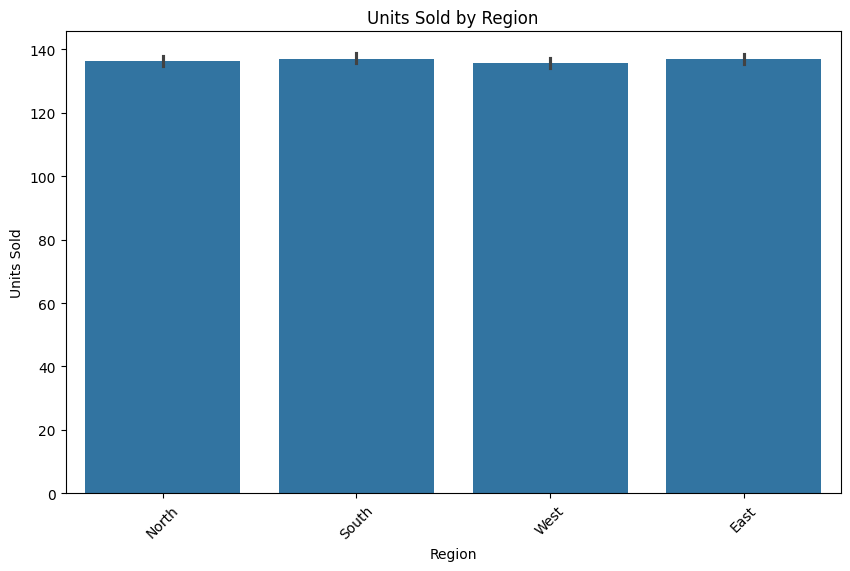

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Units Sold', data=data)
plt.title('Units Sold by Region')
plt.xticks(rotation=45)
plt.show()

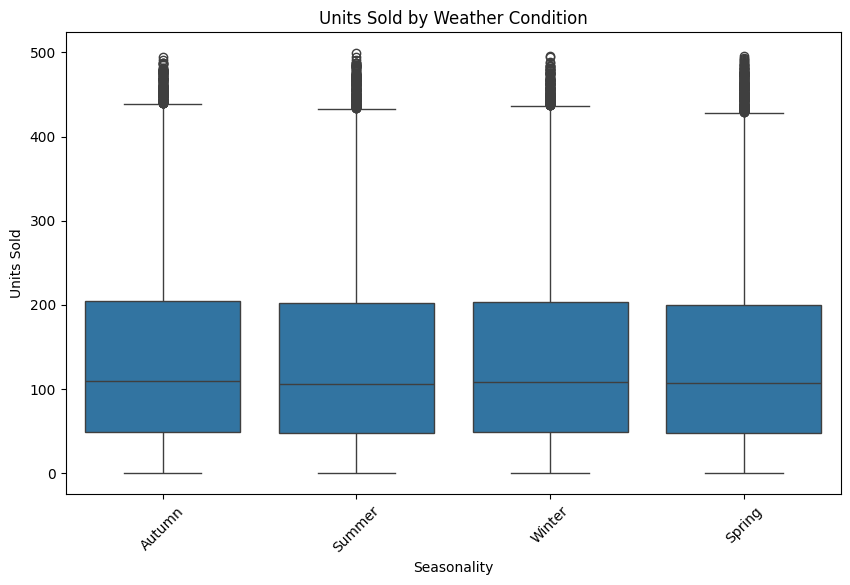

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Seasonality', y='Units Sold', data=data)
plt.title('Units Sold by Weather Condition')
plt.xticks(rotation=45)
plt.show()

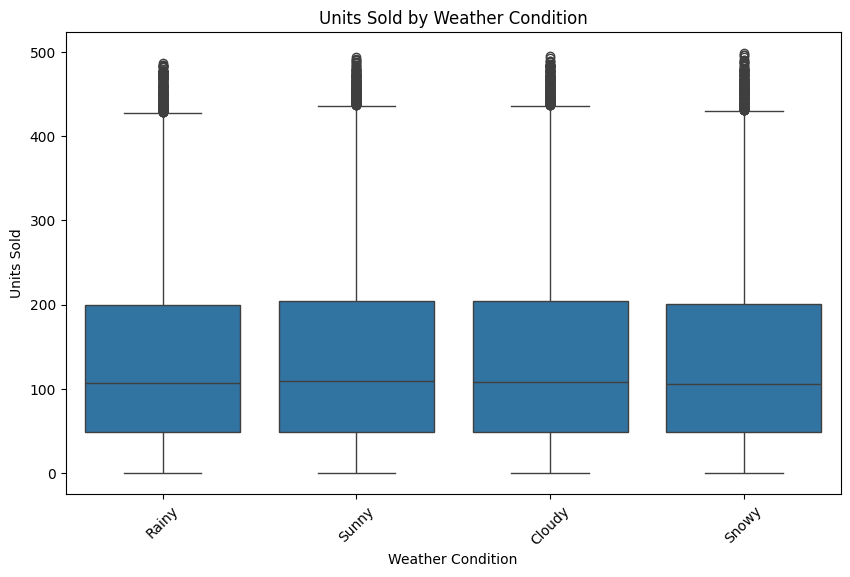

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Weather Condition', y='Units Sold', data=data)
plt.title('Units Sold by Weather Condition')
plt.xticks(rotation=45)
plt.show()

In [26]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
datetime_cols = data.select_dtypes(include=['datetime']).columns.tolist()


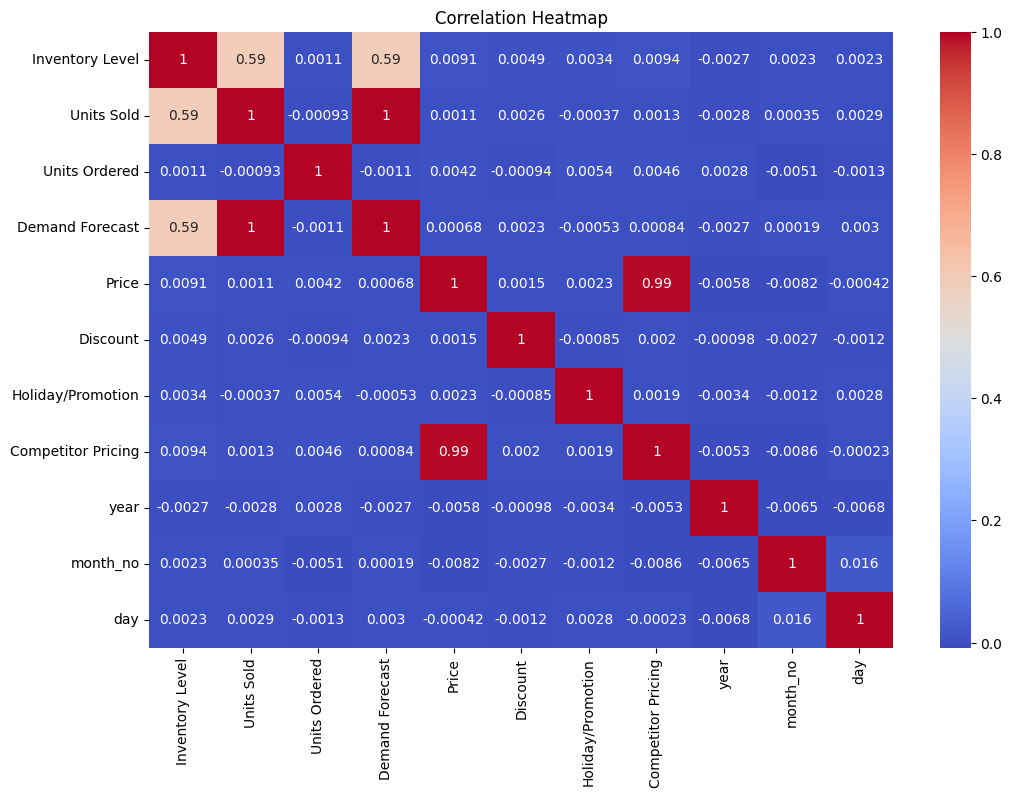

In [27]:
numerical_data = data[numerical_cols]

plt.figure(figsize=(12,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
categorical_cols

['Category', 'Region', 'Weather Condition', 'Seasonality']

In [29]:
data['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

In [30]:
data['Region'].unique()

array(['North', 'South', 'West', 'East'], dtype=object)

In [31]:
data['Weather Condition'].unique()

array(['Rainy', 'Sunny', 'Cloudy', 'Snowy'], dtype=object)

In [32]:
data['Seasonality'].unique()

array(['Autumn', 'Summer', 'Winter', 'Spring'], dtype=object)

In [33]:
# data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [34]:
# data_encoded

In [36]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform categorical data
encoded_array = ohe.fit_transform(data[categorical_cols])

# Get feature names for encoded columns
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=data.index)


In [37]:
# Drop original categorical columns
data_noncategorical = data.drop(columns=categorical_cols)

# Concatenate the encoded columns with non-categorical data
data_encoded = pd.concat([data_noncategorical, encoded_df], axis=1)



In [38]:
data_encoded.head()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,year,...,Category_Toys,Region_North,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter
0,2022-01-01,231,127,55,135.47,33.50,20,0,29.69,2022,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01,204,150,66,144.04,63.01,20,0,66.16,2022,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2022-01-01,102,65,51,74.02,27.99,10,1,31.32,2022,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2022-01-01,469,61,164,62.18,32.72,10,1,34.74,2022,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,166,14,135,9.26,73.64,0,0,68.95,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
X = data_encoded.drop(columns=['Demand Forecast'])
y = data_encoded['Demand Forecast']


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
X_train.shape

(58480, 24)

In [42]:
X_test.shape

(14620, 24)

In [43]:
y_train.shape

(58480,)

In [44]:
y_test.shape

(14620,)

In [47]:
numerical_cols.remove('Demand Forecast')


In [48]:
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])